# **Title: Bangla Medical Chatbot: Enhancing Healthcare Communication through Conversational AI**

**Abstract:**

In the realm of healthcare, efficient communication plays a pivotal role in ensuring patient understanding and accessibility to medical information. This project aims to develop a Bangla language-based chatbot specialized in medical conversations, providing a user-friendly interface for individuals seeking information and assistance related to healthcare in Bangladesh.

**Objective:**

The primary objective of this project is to create a conversational AI tool tailored for the Bangla-speaking population, facilitating discussions on medical queries, symptoms, treatments, and general health information. The chatbot aims to bridge the gap between individuals and healthcare resources, offering a personalized and accessible platform for users to seek advice, schedule appointments, and receive relevant health information.

In [ ]:
pip install bnlp_toolkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 24.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.5/993.5 kB 56.4 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171033 sha256=32ef3f142d3a481d225f7efcbcff5c1a534edef947f74e29a03aa2f84c36f6fe
  Stored in directory: /root/.cache/pip/wheels/31/8a/8c/315c9e5d7773f74b33d5ed33f075b49c6eaeb7cedbb86e2cf8
Successfully built emoji


In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import json
from bnlp import BasicTokenizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input, Embedding, LSTM , Dense, GlobalMaxPool1D, Flatten
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

punkt not found. downloading...


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In this part we are loading the dataset in our code


In [ ]:
#import the data
with open('dataset.json')as contant:
  data1 = json.load(contant)

Here we can see the data

In [ ]:
data1

{'intents': [{'tag': 'Greetings',
   'patterns': ['এই যে', 'হেলো', 'হ্যালো', 'হাই', 'হে', 'হায়'],
   'responses': ['হাই  %% USER %% ! আমি কীভাবে সাহায্য করতে পারি?',
    'হ্যালো %% USER %%, আমি আপনাকে কীভাবে সাহায্য করতে পারি?',
    'হ্যালো %% USER %% !  আমি আপনার জন্য কী করতে পারি?',
    'হাই %% USER %%, আমি আপনাকে কীভাবে সাহায্য করতে পারি?',
    'হাই  %% USER %%, আমি আপনার জন্য কী করতে পারি?']},
  {'tag': 'CourtesyGreeting',
   'patterns': ['আপনি কেমন আছেন?',
    'হাই, আপনি কেমন আছেন?',
    'হ্যালো, আপনি কেমন আছেন?',
    'কি অবস্থা , আপনার?',
    'কি খবর , আপনার?',
    'কি খবর ?',
    'কি অবস্থা ?',
    'তুমি কেমন আছো?',
    'কেমন আছো?',
    'আপনি ভাল করছেন আশা করি?',
    'ভাল আছো আশা করি?',
    'ভাল আছো ?',
    'হ্যালো আশা করি আপনি ভাল করছেন?'],
   'responses': ['আমি খুব ভালো, আপনি কেমন আছেন? ',
    'হ্যালো, আপনি কেমন আছেন? আমি ভালো ',
    'হ্যালো, আমি ভাল আছি আপনাকে ধন্যবাদ',
    'হাই, আমি ভাল আছি আপনাকে ধন্যবাদ, কেমন আছেন?',
    'হাই, ভাল আপনাকে ধন্যবাদ, আপনি কেমন আছেন?']},
  {'ta

From the dataset we are splitting the datas in tags , the patterns as input and responses

In [ ]:
#getting all the data to lists
tags = []
inputs = []
responses = {}
for intent in data1['intents']:
  responses[intent['tag']]= intent['responses']
  for lines in intent['patterns']:
    inputs.append(lines)
    tags.append(intent['tag'])

In [ ]:
print(tags)
print(inputs)
print(responses)

['Greetings', 'Greetings', 'Greetings', 'Greetings', 'Greetings', 'Greetings', 'CourtesyGreeting', 'CourtesyGreeting', 'CourtesyGreeting', 'CourtesyGreeting', 'CourtesyGreeting', 'CourtesyGreeting', 'CourtesyGreeting', 'CourtesyGreeting', 'CourtesyGreeting', 'CourtesyGreeting', 'CourtesyGreeting', 'CourtesyGreeting', 'CourtesyGreeting', 'CurrentHumanQuery', 'CurrentHumanQuery', 'CurrentHumanQuery', 'CurrentHumanQuery', 'CurrentHumanQuery', 'CurrentHumanQuery', 'CurrentHumanQuery', 'NameQuery', 'NameQuery', 'NameQuery', 'NameQuery', 'NameQuery', 'NameQuery', 'RealNameQuery', 'RealNameQuery', 'RealNameQuery', 'RealNameQuery', 'RealNameQuery', 'RealNameQuery', 'RealNameQuery', 'TimeQuery', 'TimeQuery', 'TimeQuery', 'TimeQuery', 'TimeQuery', 'TimeQuery', 'TimeQuery', 'Thanks', 'Thanks', 'Thanks', 'Thanks', 'Thanks', 'Thanks', 'NotTalking2U', 'NotTalking2U', 'NotTalking2U', 'NotTalking2U', 'NotTalking2U', 'NotTalking2U', 'NotTalking2U', 'Jokes', 'Jokes', 'Jokes', 'Jokes', 'Jokes', 'Understa

Now lets convert the dataframe based on their input and tags

In [ ]:
#convert to dataframe
data = pd.DataFrame({"patterns":inputs,"tags":tags})

In [ ]:
#printing the data
data

,patterns,tags
0,এই যে,Greetings
1,হেলো,Greetings
2,হ্যালো,Greetings
3,হাই,Greetings
4,হে,Greetings
...,...,...
760,অপ্রকাশিত সময়ে ঘুম,Narcolepsy
761,অচেতন অবস্থা এবং স্বল্পকালিক অবস্থা,Narcolepsy
762,নিদ্রা এবং বিশ্রাম এবং দিনের যে কোনও সময়ে বিশ...,Narcolepsy
763,জাগা অবস্থা এবং নিদ্রা প্রবৃত্তি,Narcolepsy


In [ ]:
data = data.sample(frac=1)

#**Pre-Processing**




Important pre-procession such as removing the punctuations, converting to lowercase and encoding the texual data to numerical data are done

In [ ]:
#removing punctuations
import string
data["patterns"] = data["patterns"].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
data["patterns"] = data["patterns"].apply(lambda wrd: ''.join(wrd))
data

,patterns,tags
91,আপনি খুব বুদ্ধিমান মেয়ে,Clever
678,কথা বলতে প্রারম্ভে কষ্ট,ADHD
281,কাঁপুনি দিয়ে শীত শীত অনুভব হচ্ছে,Malaria
656,অক্ষম অম্লের অসুস্থতা,AutoimmuneDisease
171,বারেবারে প্রস্রাব হচ্ছে,Diabetes
...,...,...
679,দুর্বল মনোভাব,ADHD
160,মাথাব্যথা করছে,Normal Fever
341,শরীর হলুদ বর্ণ ধারন করেছে,Hepatitis B
446,যক্ষ্মা আক্রান্ত হলে ক্ষুদা কম পায়।,Tuberculosis


In [ ]:
print(data["patterns"])

91                আপনি খুব বুদ্ধিমান মেয়ে
678                কথা বলতে প্রারম্ভে কষ্ট
281       কাঁপুনি দিয়ে শীত শীত অনুভব হচ্ছে
656                  অক্ষম অম্লের অসুস্থতা
171                বারেবারে প্রস্রাব হচ্ছে
                      ...                 
679                          দুর্বল মনোভাব
160                         মাথাব্যথা করছে
341              শরীর হলুদ বর্ণ ধারন করেছে
446    যক্ষ্মা আক্রান্ত হলে ক্ষুদা কম পায়।
109                           দুর্বল লাগছে
Name: patterns, Length: 765, dtype: object


In [ ]:
#tokenize the data
tokenizer = Tokenizer(num_words= 2000)
tokenizer.fit_on_texts(data["patterns"])
train = tokenizer.texts_to_sequences(data["patterns"])
print(train)
#apply padding
from tensorflow.keras.preprocessing.sequence import pad_sequences
x_train = pad_sequences(train)


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
#encoding the outputs
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(data['tags'])

Tensorflow's tokenizer assigns a uniqe token to each dustance word and padding is done to get all the data to the same length so as to send it to an RNN layer

In [ ]:
input_shape = x_train.shape[1]
print(input_shape)

12


In [ ]:
#define vocabulary
vocabulary = len(tokenizer.word_index)
print("number of unique words :",vocabulary)
output_lenth = le.classes_.shape[0]
print("Output lenth : ",output_lenth)


number of unique words : 757
Output lenth :  58


# Neural Network

The Network consist of an embedding layer which is one of the most powerful things in the field of natural language processing. The outputs of the embedding layer is the input of the recurrent layer with LSTM gate, then, the output is flutternd and a reguler dense layer is used with a softmax activation function


Here the main part is the embedding layer which gives a corresponding vector for each word in the dataset


In [ ]:
from bnlp import BengaliWord2Vec
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
import numpy as np

# Load pre-trained Bengali word embeddings
word_embedding = BengaliWord2Vec()

sample_word = list(tokenizer.word_index.keys())[0]  # Get any sample word from the tokenizer
embedding_dim = len(word_embedding.get_word_vector(sample_word))
vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because the indexing starts from 1

embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in tokenizer.word_index.items():
    try:
        embedding_vector = word_embedding.get_word_vector(word)
        embedding_matrix[i] = embedding_vector
    except KeyError:
        # Word not in the pre-trained embeddings, leave the embedding vector as zeros
        pass  # Placeholder for an empty block

# Define the input shape, vocabulary size, and embedding dimension
input_shape = x_train.shape[1]

# Create a Sequential model
model = Sequential()

# Add an Embedding layer with pre-trained embeddings
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=input_shape, weights=[embedding_matrix], trainable=False))

# Add an LSTM layer
model.add(LSTM(100))

# Add a Dense layer for further processing
num_classes = len(np.unique(data['tags']))
model.add(Dense(num_classes, activation='softmax'))

# Ensure that your labels are integers (not one-hot encoded)
y_train = le.fit_transform(data['tags'])
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


Extracting: bangla_word2vec_gen4.zip:   0%|          | 0/8 [00:00<?, ?it/s]

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 12, 100)           75800     
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 58)                5858      
                                                                 
Total params: 162058 (633.04 KB)
Trainable params: 86258 (336.95 KB)
Non-trainable params: 75800 (296.09 KB)
_________________________________________________________________


In [ ]:
#training the model
train = model.fit(x_train, y_train, epochs=300)

Epoch 1/300
24/24 [==============================] - 6s 4ms/step - loss: 3.8302 - accuracy: 0.0889
Epoch 2/300
24/24 [==============================] - 0s 4ms/step - loss: 3.2882 - accuracy: 0.1895
Epoch 3/300
24/24 [==============================] - 0s 4ms/step - loss: 2.8832 - accuracy: 0.2928
Epoch 4/300
24/24 [==============================] - 0s 4ms/step - loss: 2.5399 - accuracy: 0.3778
Epoch 5/300
24/24 [==============================] - 0s 4ms/step - loss: 2.2312 - accuracy: 0.4562
Epoch 6/300
24/24 [==============================] - 0s 4ms/step - loss: 1.9815 - accuracy: 0.5163
Epoch 7/300
24/24 [==============================] - 0s 4ms/step - loss: 1.7522 - accuracy: 0.5529
Epoch 8/300
24/24 [==============================] - 0s 4ms/step - loss: 1.5716 - accuracy: 0.6105
Epoch 9/300
24/24 [==============================] - 0s 4ms/step - loss: 1.4253 - accuracy: 0.6366
Epoch 10/300
24/24 [==============================] - 0s 4ms/step - loss: 1.2937 - accuracy: 0.6654
Epoch 11/

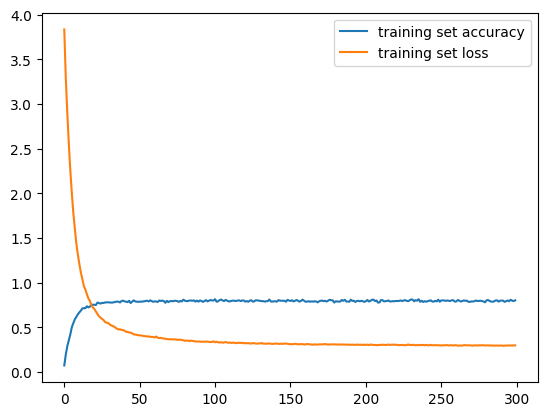

In [ ]:
#plotting model accuracy
plt.plot(train.history['accuracy'],label='training set accuracy')
plt.plot(train.history['loss'],label='training set loss')
plt.legend()

In [ ]:
import random
import string
from tensorflow.keras.preprocessing.sequence import pad_sequences

while True:
    prediction_input = input("জসিম: ")

    # Removing punctuation and converting to lowercase
    prediction_input = [letter.lower() for letter in prediction_input if letter not in string.punctuation]
    prediction_input = ''.join(prediction_input)

    # Tokenizing and padding
    prediction_input = tokenizer.texts_to_sequences([prediction_input])
    prediction_input = pad_sequences(prediction_input, maxlen=input_shape)

    # Getting output from the model
    output = model.predict(prediction_input)
    output = output.argmax()

    # Finding the right tag and predicting
    response_tag = le.inverse_transform([output])[0]
    response = random.choice(responses[response_tag])
    print("সালেহা:", response)

    # Check for goodbye tag and exit the loop
    if response_tag.lower() == 'goodbye':
        break
